<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Python-Notebook-Banners/Examples.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>

# Examples: Hierarchical clustering
© ExploreAI Academy

In this train, we will cover hierarchical clustering, focusing on agglomerative clustering. We will explore the algorithm, interpret dendrograms, implement it using sklearn and SciPy, and determine the optimal number of clusters.

## Learning objectives
By the end of this train, you should be able to:

* Understand hierarchical clustering.
* Interpret dendrograms.
* Implement agglomerative clustering in sklearn and SciPy.
* Determine the optimal number of clusters from a dendrogram.
* Explore the advantages and disadvantages of agglomerative hierarchical clustering.

## Introduction

In this train, we discuss **Hierarchical clustering** - a clustering method where data is arranged in a tree-like structure such that parent clusters contain smaller child clusters, which also have their own child clusters and so on. There are two main types of hierarchical clustering algorithms:
1. Divisive hierarchical clustering - a top-down clustering approach that starts with a large single cluster and iteratively divides it into smaller and smaller clusters until each cluster contains a single data point.
2. Agglomerative hierarchical clustering - a bottom-up approach that starts with many "single data point clusters" and iteratively merges them into fewer and fewer clusters until all data points belong to the same cluster.

These two methods are similar and rely on the same concepts. As such, we will only cover agglomerative hierarchical clustering in this train.


## Agglomerative hierarchical clustering
The hierarchical clustering algorithm operates by defining a **"dissimilarity" measure** (most commonly taken as the Euclidean distance) between pairs of data points. Each data point initially begins as its own cluster and the two "most similar" clusters join to form a new cluster and this is repeated iteratively until all the data points belong to the same cluster. Once this process is complete, a suitable number of clusters can be determined by the resulting **dendrogram**. The advantage of this algorithm is that we do not need to decide on the number of clusters K beforehand, as is the case with the k-means algorithm.   

**The basic algorithm of Agglomerative clustering is as follows**:
1. Let each data point be a cluster
2. Compute the distance matrix
3. Determine the linkage criteria to merge the clusters
4. Repeat: Merge the two closest clusters and update the distance matrix
5. Continue until only a single cluster remains

The algorithm can be summarised using the following pseudocode:

<pre>
*start with each observation in its own cluster

n_clusters = n_observations

while n_clusters > 1:
      
      *compare all pairwise distances between clusters
      
      *find the closest (i.e. least dissimilar) two clusters and merge them
      
      n_clusters -= 1
</pre>

## Choosing which two clusters to merge

Hierarchical clustering methods heavily rely on how the dissimilarity measure is computed. Furthermore, we might get completely different results depending on how we choose to compute this dissimilarity. The only way we can adjust the dissimilarity is through the following hierarchical clustering hyperparameters:
  1. Distance metric; and
  2. Linkage method.
  
Each hyperparameter will determine the criteria on which we base our decision to merge any two clusters.  

### 1. Distance metric
There is a wide variety of distance metrics from which to choose. The most commonly used metric is the Euclidean distance, the straight line distance between two points. Other standard metrics include the Chebyshev and Manhattan distances. Below, the grey values in each cell represent the distance from the cell containing the blue dot to that cell.

<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/sketch-distances.png?raw=true" alt="Dendrogram" style="width: 80%;"/>  

Here is an excellent explanation of these three metrics, taken from [this website](https://lyfat.wordpress.com/2012/05/22/euclidean-vs-chebyshev-vs-manhattan-distance/):   

> "In chess, the distance between squares on the chessboard for rooks is measured in Manhattan distance; kings and queens use Chebyshev distance, and bishops use the Manhattan distance (between squares of the same colour) on the chessboard rotated 45 degrees, i.e., with its diagonals as coordinate axes. To reach from one square to another, only kings require the number of moves equal to the distance; rooks, queens and bishops require one or two moves (on an empty board, and assuming that the move is possible at all in the bishop’s case)."

There are still many more distance metrics from which you can choose. We will be using the `SciPy` library for clustering, so you should take a look at [their docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy.spatial.distance.pdist) for a list of all available distance metrics.

### 2. Linkage method
The linkage method determines _how_ we measure the chosen distance between two clusters.   

Take a moment to consider how you would measure the distance between two clusters with multiple points. Would you choose to measure the distance between the closest two points? The furthest? The average of all distances?   

All of these are valid options! The diagram below illustrates the three most common linkage methods:

<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/sketch-linkages.png?raw=true" alt="Dendrogram" style="width: 70%;"/>  
 

  1. **Single linkage:** The distance between the two closest points;
  2. **Complete linkage:** The distance between the two furthest points;
  3. **Average linkage:** The average of all pairwise distances between points.
  
Again, there are still a few more linkage methods, which you can check out in the [SciPy docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html).

## Dendrograms
A dendrogram is a plot that can be used to assist with visualising hierarchical clustering and determining the appropriate number of clusters. It has the initial clusters on one axis (i.e., every data point) while the other axis shows dissimilarity (for example, the Euclidean distance between the clusters).
   
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/sketch-dendrogram.png?raw=true" alt="Dendrogram" style="width: 80%;"/>

#### An example
We start with the points that are the closest together as they join lowest down on the dissimilarity scale; these are known as the *leaves* of the dendrogram. In our example above, the following pairs of points are the closest and approximately equidistant, thus forming the new clusters: B & C, E & F, H & I, and J & K. The next closest point is A, which is closest to the cluster containing B & C, so it joins that cluster and so on and this process continues until all points are within a single cluster, as seen above on the left. 

### Choosing an appropriate number of clusters
To determine the ideal number of clusters using the dendrogram, we look for the most significant vertical distance that would not be intersected if the perpendicular lines to the dissimilarity axis were extended. The figure below might help clarify this.   

<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/sketch-dendrogram-2.png?raw=true" alt="Dendrogram" style="width: 50%;"/>  

The lines perpendicular to the dissimilarity axis have been extended as dashed lines, and the red arrow indicates the maximum uninterrupted distance parallel to the dissimilarity axis. We can determine the ideal number of clusters by looking at how many lines run parallel to the dissimilarity axis in this area (which is two as there are two lines parallel to the dissimilarity axis within this area).

## Hierarchical clustering in Python
We will now perform hierarchical clustering on generated toy data. 

### Setting up the data
Let's import the libraries we will need and go ahead and generate some data. 

In [1]:
# data processing
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# plotting
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
%matplotlib inline

In [2]:
# make 8 blobs in 2D space
n_features = 2
centers = 8

X, y = make_blobs(n_samples=1000, centers=centers, n_features=n_features, random_state=68) #rand = 8, 42


df = pd.DataFrame(X, columns=[*[f'feature_{i}' for i in range(n_features)]])

# plot data
plt.figure(dpi=120)

x1 = df['feature_0']
x2 = df['feature_1']
plt.scatter(x1, x2)

plt.title("Figure 1")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

Text(0, 0.5, 'Feature 2')

In [3]:
df.head()

,feature_0,feature_1
0,-5.295432,-9.053238
1,2.058577,-5.251177
2,3.687847,9.551016
3,-3.914157,-8.430547
4,2.510445,9.198077


### Scaling of features
Since we are dealing with a distance measure between points, we must scale our data before computing dissimilarities. Without scaling, the clustering results will most likely depend on the feature(s) with the largest measurement scale.

We will create a new 2D array called X_scaled containing the scaled features to profile the clusters in their original units of measure later.

In [4]:
# create scaler object
scaler = StandardScaler()

# scale the data
X_scaled = scaler.fit_transform(df)

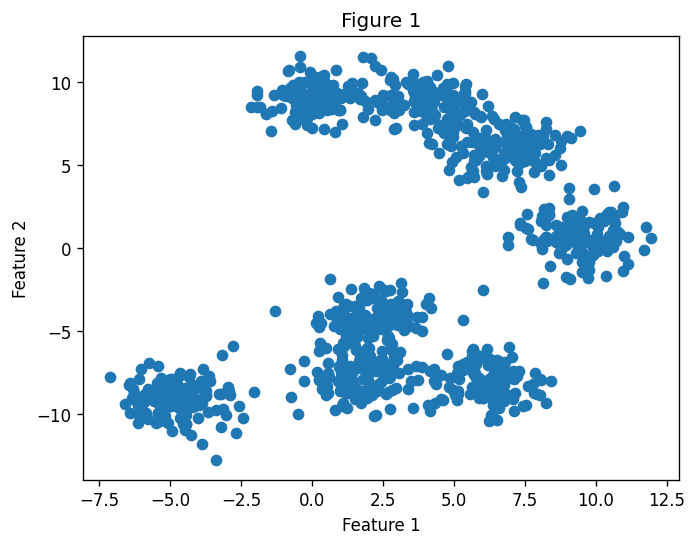

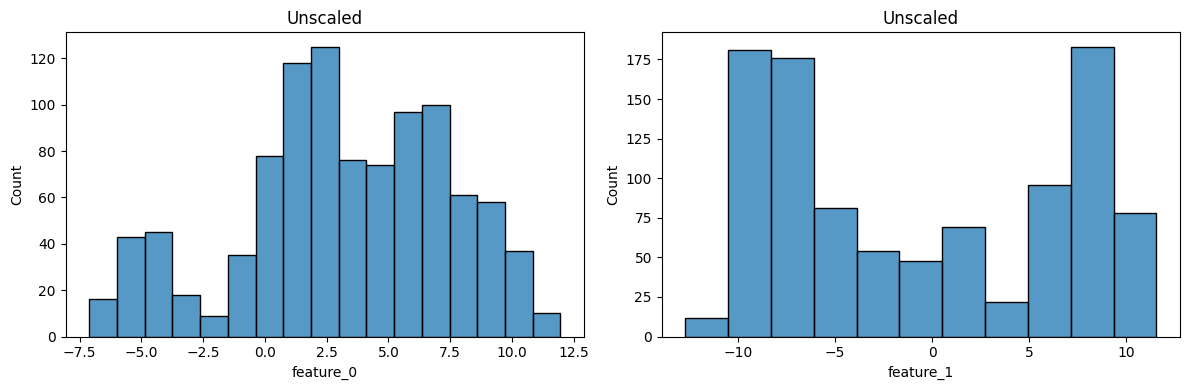

In [5]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.histplot(df.iloc[:,0])
plt.title('Unscaled')
plt.gca().set_aspect('auto', adjustable='box')  # Adjust aspect ratio

plt.subplot(1,2,2)
sns.histplot(df.iloc[:,1])
plt.title('Unscaled')
plt.gca().set_aspect('auto', adjustable='box')  # Adjust aspect ratio

plt.tight_layout()
plt.show()


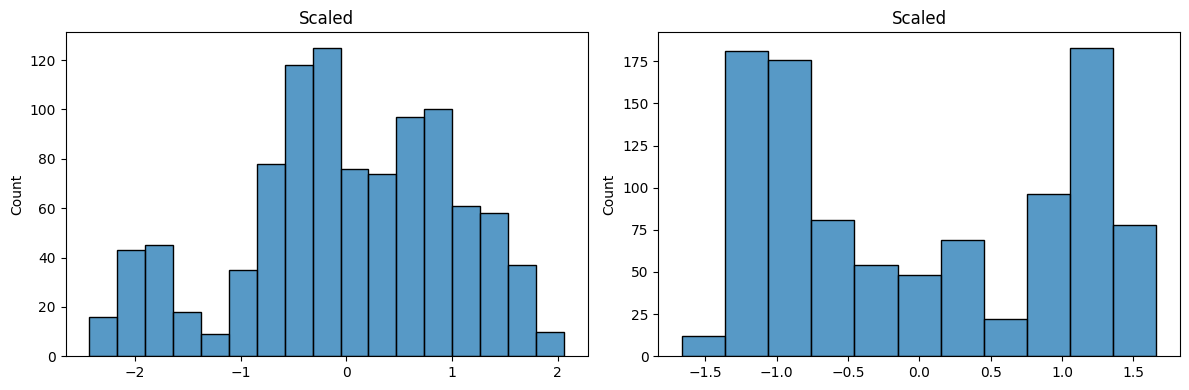

In [6]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.histplot(X_scaled[:,0])
plt.title('Scaled')
plt.gca().set_aspect('auto', adjustable='box')  # Adjust aspect ratio

plt.subplot(1,2,2)
sns.histplot(X_scaled[:,1])
plt.title('Scaled')
plt.gca().set_aspect('auto', adjustable='box')  # Adjust aspect ratio

plt.tight_layout()
plt.show()


### Generate dendrogram
Now that we have chosen our hyperparameters, we can create our dendrogram by performing hierarchical clustering on our scaled features. Our strategy here is as follows:

1. Generate and visualise the dendrogram using the SciPy library.
2. Use a dendrogram to determine the optimal number of clusters.
3. Use the number of clusters to fit `sklearn`'s agglomerative hierarchical algorithm to the data.

You are encouraged to try different distance metrics and linkage methods and see how your results differ.   

In [7]:
from scipy.cluster.hierarchy import ward, dendrogram
import scipy.cluster.hierarchy as sch

We can perform hierarchical clustering in SciPy using the `linkage` function from the `scipy.cluster.hierarchy` module. This function returns a linkage matrix (our hierarchical clustering encoded as an array). It is at this point that we convert this linkage matrix into our dendrogram. 

In [8]:
# uncomment to view linkage function docstring
# help(sch.linkage)

In [9]:
# Perform hierarchical clustering
linkage_matrix = sch.linkage(X_scaled, method='average', metric='euclidean')

In [ ]:
# Generate and plot dendrogram
plt.figure(figsize=(10,6))
dendrogram = sch.dendrogram(linkage_matrix)#, no_plot=True) # no_plot because we want to plot manually

# The linkage matrix also contains the dissimilarity measures associated with each merge we've done
# We can use these to plot a few horizontal lines on the dendrogram
# that can help us find the right number of clusters better
z = linkage_matrix[:,2]

for i in range(1,16):
    rng = [z[-i],z[-i]]
    dom = [0,40000]
    plt.plot(dom,rng,'black', alpha=0.3)

plt.title('Dendrogram')
plt.xlabel('Datapoints')
plt.ylabel('Dissimilarity')

plt.show()

The dendrogram records which clusters were merged at each iteration and the resulting increase in total dissimilarity. Initially, all observations began as their own clusters (0 on the y-axis) and were iteratively merged until all observations belonged to the same cluster (top of the y-axis).      

We choose our optimal number of clusters by looking for the point at which merging the closest two clusters results in the most significant increase in dissimilarity. The Scipy plotting method helps us out a bit here by indicating the optimal number of clusters with colours.  We can see that the most significant increase in dissimilarity occurs when we merge from 4 into 3 clusters, so we will choose to use 4 clusters.

Looking at the above, it looks like our chosen hyperparameters `linkage='average' ` and `metric='euclidean'` could not detect the smaller clusters. The dataset has 8 clusters, but we are only able to pick up the 4 that have the best separation from each other. In other words, clusters that were too close to each other have been merged.

In your own time, develop a hyperparameter configuration that recognises all 8 clusters.

## Agglomerative hierarchical clustering in Sklearn

To implement Agglomerative Hierarchical Clustering in Sklearn, we have to do the following:

* Import the AgglomerativeClustering class;
* Create an instance of the `AgglomerativeClustering` class, specifying the number of clusters and
* Use the `fit()` method to find the specified number of clusters.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
K = 4
hc = AgglomerativeClustering(n_clusters=K, linkage='average', metric='euclidean').fit(X_scaled)
df['cluster_label']  = hc.labels_
df['cluster_label'] = df['cluster_label'].astype('int64')

Let's visualise how well we did with $K=4$

In [ ]:
# plot data
plt.figure(dpi=120)
for k in range(K):
    x1 = df[df['cluster_label'] == k]['feature_0']
    x2 = df[df['cluster_label'] == k]['feature_1']
    plt.scatter(x1, x2, label="k = "+str(k+1))


plt.legend()
plt.title("K = 4")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

## Cluster profiling
The next step is to explore the results of clustering. Can we identify any patterns or trends in the four clusters?   

Let's start by aggregating the clusters by their median feature values:

In [ ]:
df.groupby('cluster_label').agg('median').T

In [ ]:
# We can also look at the size of each cluster by counting the data points it contains
df.groupby(
    'cluster_label').count().reset_index().plot(kind='bar',
                                              x='cluster_label',
                                              figsize=(8,6),
                                              title='Number of data points per Cluster')
plt.xlabel("Clusters")
plt.ylabel("# of data points")
plt.show()

## Advantages & disadvantages of agglomerative hierarchical clustering

**Advantages**

* Simple to implement;
* No prior information about the number of clusters in the data is required.

**Disadvantages**

* The algorithm takes much longer to run compared to K-Means clustering, worsening as the size of the dataset increases;
* Determining an ideal number of clusters can be difficult by looking at the dendrogram.

## Conclusion

You have now learned how to use hierarchical clustering. We covered:

- Agglomerative vs divisive hierarchical clustering;
- Different ways of choosing how cluster dissimilarity is computed and
- An implementation of hierarchical clustering, which uses both sklearn and SciPy.

## Appendix 
Links to additional resources to help with the understanding of concepts presented in the train:

- [Hierarchical clustering distance measures](https://youtu.be/VMyXc3SiEqs?list=PLBv09BD7ez_7qIbBhyQDr-LAKWUeycZtx)